In [20]:
library(tidyverse)
library(rvest)
library(stringr)
library(repr)
library(tidymodels)
library(infer)
library(dplyr)

In [184]:
# Reading Data
id <- "1InFZlQaj3VzFHzhh5j8WJyDf4HmcD__-" # google file ID
vpd_crime_data <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id))
vpd_crime_data <- na.omit(vpd_crime_data)
head(vpd_crime_data)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft of Vehicle,2020,4,19,21,30,29XX SLOCAN ST,Renfrew-Collingwood,496397.5,5456123
2,Theft of Vehicle,2020,2,21,1,43,29XX VENABLES ST,Hastings-Sunrise,496801.2,5458182
3,Theft of Vehicle,2020,2,11,1,30,29XX VIRTUAL WAY,Renfrew-Collingwood,497011.9,5456474
4,Theft of Vehicle,2020,5,16,22,0,29XX W 10TH AVE,Kitsilano,487613.2,5456729
5,Theft of Vehicle,2020,1,1,12,0,29XX WOODLAND DR,Kensington-Cedar Cottage,494641.9,5456214
6,Theft of Vehicle,2020,11,22,0,37,2X E CORDOVA ST,Central Business District,492453.1,5458847


In [185]:
str(vpd_crime_data)

'data.frame':	37491 obs. of  10 variables:
 $ TYPE         : chr  "Theft of Vehicle" "Theft of Vehicle" "Theft of Vehicle" "Theft of Vehicle" ...
 $ YEAR         : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ MONTH        : int  4 2 2 5 1 11 8 12 1 4 ...
 $ DAY          : int  19 21 11 16 1 22 17 24 1 8 ...
 $ HOUR         : int  21 1 1 22 12 0 21 23 0 21 ...
 $ MINUTE       : int  30 43 30 0 0 37 0 30 0 0 ...
 $ HUNDRED_BLOCK: chr  "29XX SLOCAN ST" "29XX VENABLES ST" "29XX VIRTUAL WAY" "29XX W 10TH AVE" ...
 $ NEIGHBOURHOOD: chr  "Renfrew-Collingwood" "Hastings-Sunrise" "Renfrew-Collingwood" "Kitsilano" ...
 $ X            : num  496397 496801 497012 487613 494642 ...
 $ Y            : num  5456123 5458182 5456474 5456729 5456214 ...
 - attr(*, "na.action")= 'omit' Named int 1081
  ..- attr(*, "names")= chr "1081"


In [186]:
summary(vpd_crime_data)

     TYPE                YEAR          MONTH             DAY       
 Length:37491       Min.   :2020   Min.   : 1.000   Min.   : 1.00  
 Class :character   1st Qu.:2020   1st Qu.: 3.000   1st Qu.: 8.00  
 Mode  :character   Median :2020   Median : 6.000   Median :15.00  
                    Mean   :2020   Mean   : 6.175   Mean   :15.16  
                    3rd Qu.:2020   3rd Qu.: 9.000   3rd Qu.:23.00  
                    Max.   :2020   Max.   :12.000   Max.   :31.00  
      HOUR           MINUTE      HUNDRED_BLOCK      NEIGHBOURHOOD     
 Min.   : 0.00   Min.   : 0.00   Length:37491       Length:37491      
 1st Qu.: 4.00   1st Qu.: 0.00   Class :character   Class :character  
 Median :13.00   Median : 8.00   Mode  :character   Mode  :character  
 Mean   :11.46   Mean   :16.48                                        
 3rd Qu.:18.00   3rd Qu.:30.00                                        
 Max.   :23.00   Max.   :59.00                                        
       X                Y  

In [187]:
# Tidying Data
neighbourhoods <- c("Arbutus Ridge", "Fairview", "Kerrisdale", "Kitsilano", "West Point Grey") # Near UBC neighbourhoods

vpd_crime_data <- vpd_crime_data %>% 
    select(TYPE, MONTH, DAY, HOUR, HUNDRED_BLOCK, NEIGHBOURHOOD) %>%
    filter(NEIGHBOURHOOD %in% neighbourhoods)

head(vpd_crime_data)

,TYPE,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD
,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,Theft of Vehicle,5,16,22,29XX W 10TH AVE,Kitsilano
2,Theft of Vehicle,2,22,22,30XX W 12TH AVE,Kitsilano
3,Theft of Vehicle,12,24,10,30XX W BROADWAY AV,Kitsilano
4,Theft of Vehicle,7,27,21,31XX CYPRESS ST,Kitsilano
5,Theft of Vehicle,1,16,16,31XX OAK ST,Fairview
6,Theft of Vehicle,3,21,18,31XX OAK ST,Fairview


In [188]:
# Number of crimes by months
crimes_by_months <- vpd_crime_data %>%
    group_by(MONTH) %>%
    summarize(count_crimes = n())
crimes_by_months

winter_months <- c(12, 1, 2)
spring_months <- c(3, 4, 5)
summer_months <- c(6, 7, 8)
autumn_months <- c(9, 10, 11)

seasons <- c("Winter", "Spring", "Summer", "Autumn")

# Counting the number of crimes for each season separately
crimes_for_winter <- crimes_by_months %>%
    filter(MONTH %in% winter_months) %>%
    summarize(count_crimes = sum(count_crimes))

crimes_for_spring <- crimes_by_months %>%
    filter(MONTH %in% spring_months) %>%
    summarize(count_crimes = sum(count_crimes))

crimes_for_summer <- crimes_by_months %>%
    filter(MONTH %in% summer_months) %>%
    summarize(count_crimes = sum(count_crimes))

crimes_for_autumn <- crimes_by_months %>%
    filter(MONTH %in% autumn_months) %>%
    summarize(count_crimes = sum(count_crimes))

# Number of crimes in each season 
crimes_by_season <- rbind(crimes_for_winter, crimes_for_spring, crimes_for_summer, crimes_for_autumn) %>%
    cbind(seasons) 
names(crimes_by_season)[names(crimes_by_season) == "count_crimes"] <- "num_of_crimes"
crimes_by_season


,MONTH,count_crimes
,<int>,<int>
1,1,468
2,2,453
3,3,520
4,4,473
5,5,360
6,6,372
7,7,452
8,8,468
9,9,486


num_of_crimes,seasons
<int>,<chr>
1241,Winter
1353,Spring
1292,Summer
1349,Autumn


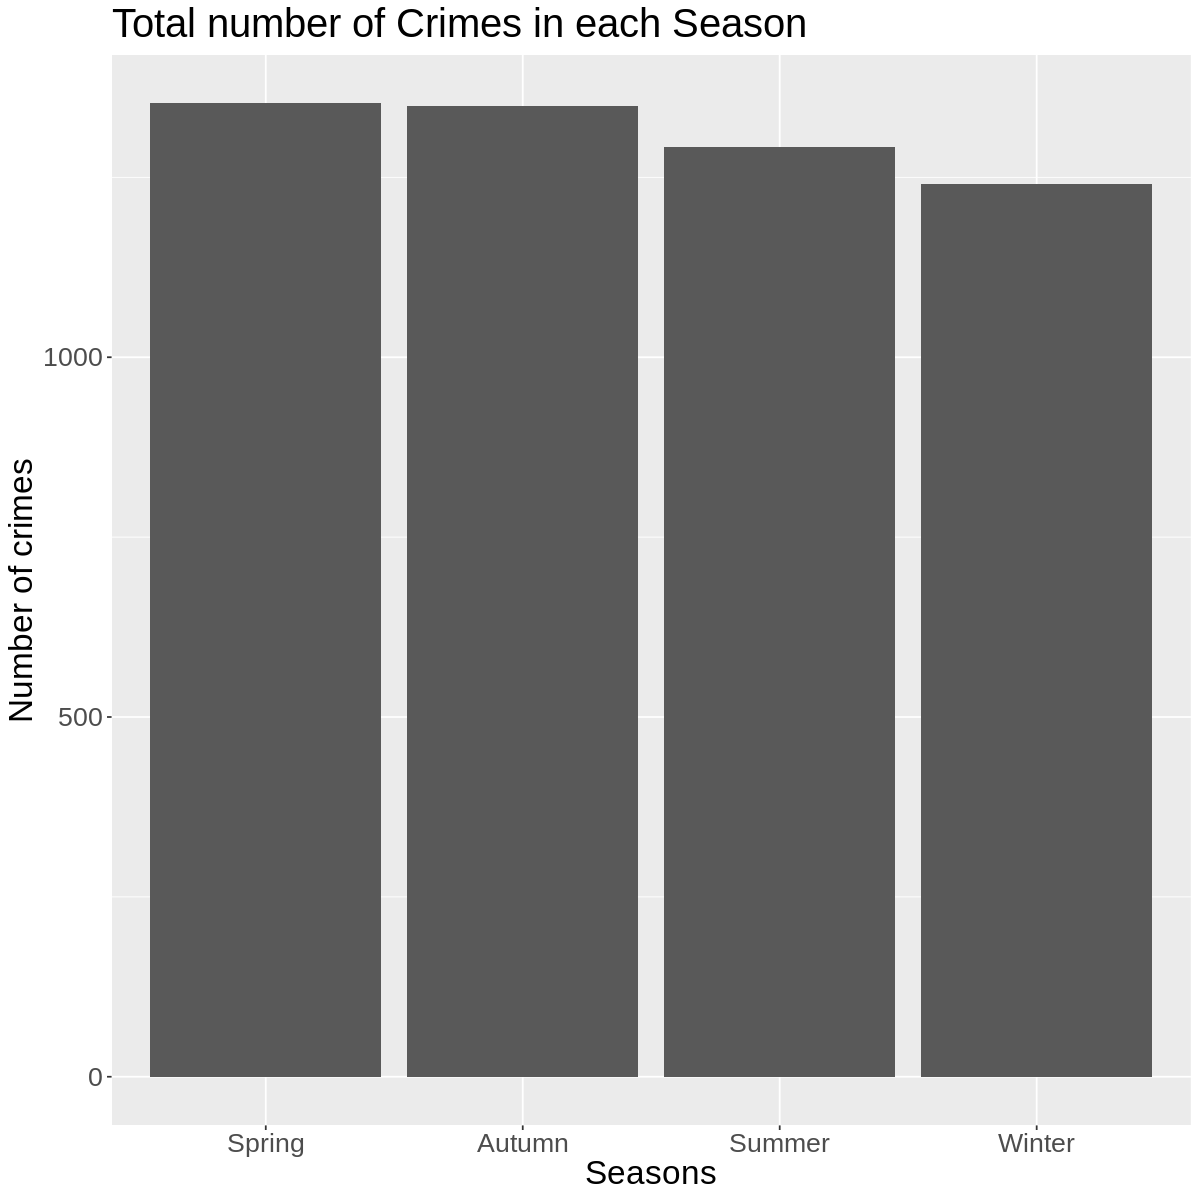

In [202]:
# Bar plot for total number of crimes in each season
options(repr.plot.width = 10, repr.plot.height = 10)

crimes_by_season_plot <- crimes_by_season %>%
    ggplot(aes(x = fct_reorder(seasons, num_of_crimes, .desc = TRUE),
               y = num_of_crimes)) +
    geom_bar(stat = "identity") +
    labs(x = "Seasons", y = "Number of crimes") +
    ggtitle("Total number of Crimes in each Season") +
    theme(text = element_text(size = 20))
crimes_by_season_plot

In [190]:
# Number of types of crimes
count_types_of_crime <- vpd_crime_data %>%
    group_by(TYPE) %>%
    summarize(count_type = n())
count_types_of_crime

,TYPE,count_type
,<chr>,<int>
1,Break and Enter Commercial,485
2,Break and Enter Residential/Other,521
3,Homicide,1
4,Mischief,679
5,Offence Against a Person,206
6,Other Theft,937
7,Theft from Vehicle,1600
8,Theft of Bicycle,568
9,Theft of Vehicle,115


In [191]:
# Number of crimes by TYPE in each season
crimes_by_type <- vpd_crime_data %>%
    group_by(TYPE, MONTH) %>%
    summarize(count_crimes = n())

# Counting the number of crimes for each season separately
crimes_for_winter_types <- crimes_by_type %>%
    filter(MONTH %in% winter_months) %>%
    summarize(count_crimes = sum(count_crimes)) %>%
    mutate(newcol = "Winter")

crimes_for_spring_types <- crimes_by_type %>%
    filter(MONTH %in% sprimg_months) %>%
    summarize(count_crimes = sum(count_crimes)) %>%
    mutate(newcol = "Spring")

crimes_for_summer_types <- crimes_by_type %>%
    filter(MONTH %in% summer_months) %>%
    summarize(count_crimes = sum(count_crimes)) %>%
    mutate(newcol = "Summer")

crimes_for_autumn_types <- crimes_by_type %>%
    filter(MONTH %in% autumn_months) %>%
    summarize(count_crimes = sum(count_crimes)) %>%
    mutate(newcol = "Autumn")

# Binding all four data frames to get the number of crimes by type in each season 
crimes_by_type_and_season <- rbind(crimes_for_winter_types, crimes_for_spring_types, 
                                   crimes_for_summer_types, crimes_for_autumn_types) 

names(crimes_by_type_and_season)[names(crimes_by_type_and_season) == "newcol"] <- "Season"
crimes_by_type_and_season

`summarise()` has grouped output by 'TYPE'. You can override using the `.groups` argument.



TYPE,count_crimes,Season
<chr>,<int>,<chr>
Break and Enter Commercial,99,Winter
Break and Enter Residential/Other,121,Winter
Mischief,192,Winter
Offence Against a Person,44,Winter
Other Theft,257,Winter
Theft from Vehicle,423,Winter
Theft of Bicycle,48,Winter
Theft of Vehicle,28,Winter
Vehicle Collision or Pedestrian Struck (with Injury),29,Winter


In [203]:
summary(crimes_by_type_and_season)

     TYPE            count_crimes      Season         
 Length:39          Min.   :  1.0   Length:39         
 Class :character   1st Qu.: 34.0   Class :character  
 Mode  :character   Median :119.0   Mode  :character  
                    Mean   :134.2                     
                    3rd Qu.:187.0                     
                    Max.   :445.0                     

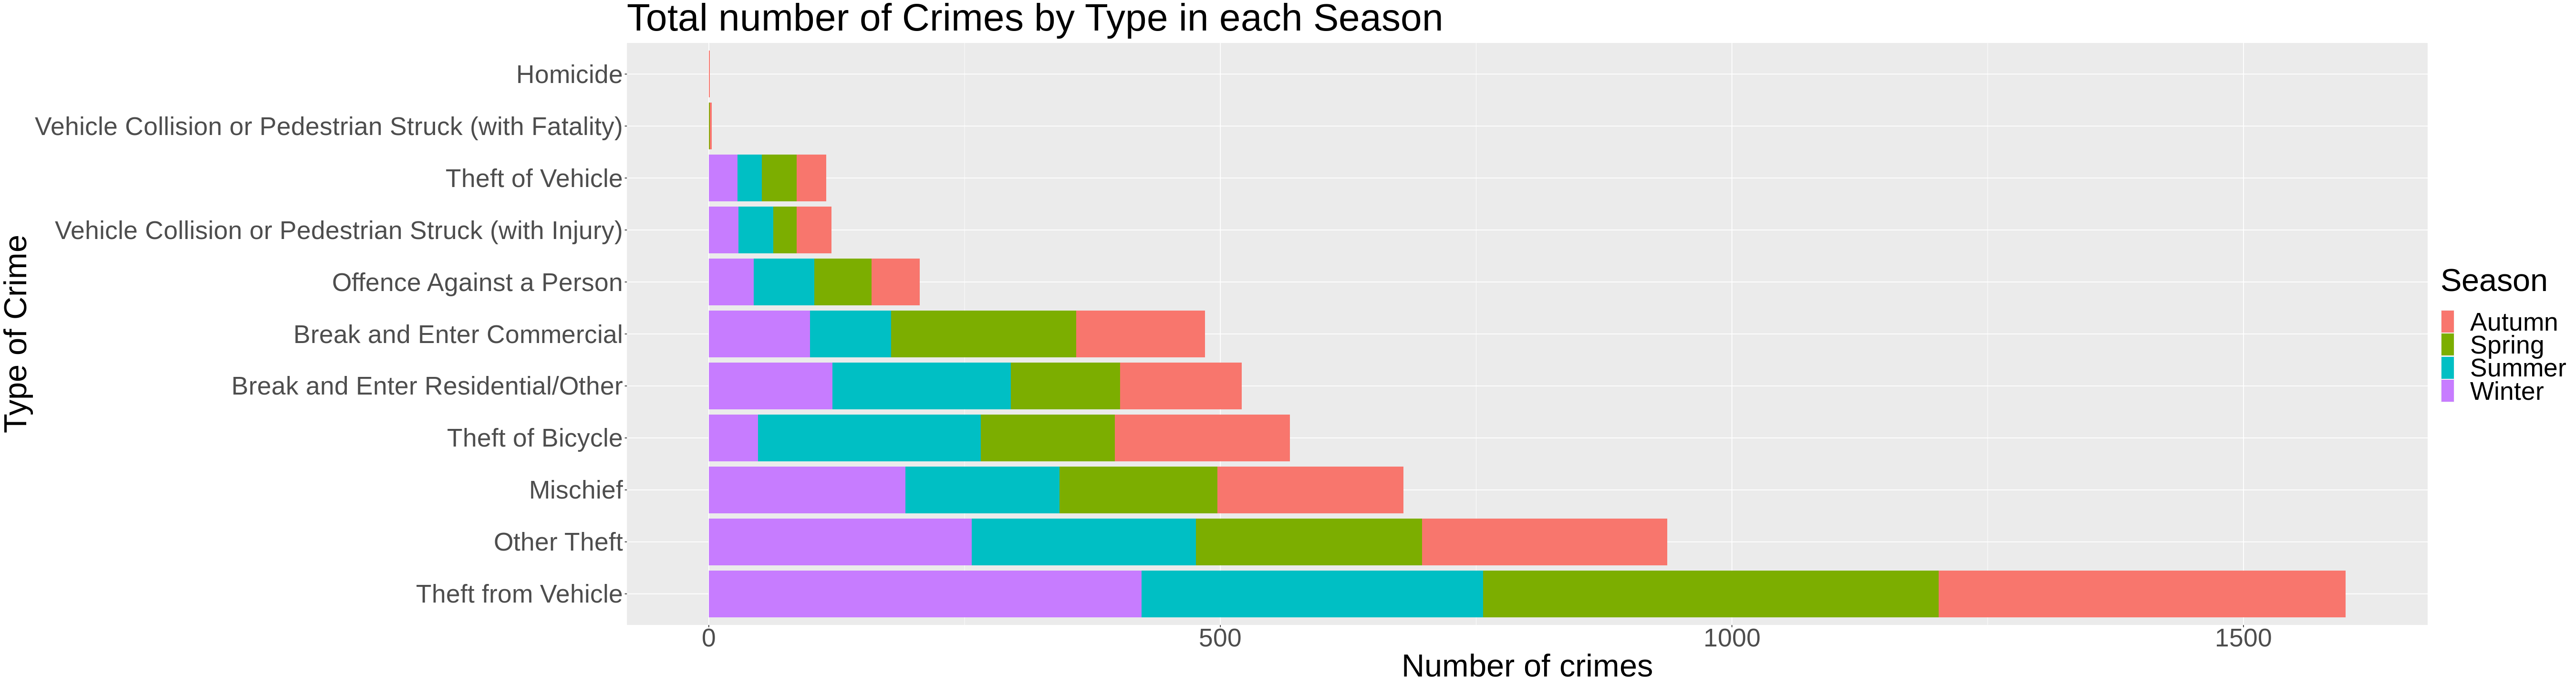

In [195]:
# Bar Plot for types of crimes in each season 
options(repr.plot.width = 45, repr.plot.height = 12)

crimes_by_type_and_season_plot <- crimes_by_type_and_season %>%
    ggplot(aes(x = count_crimes,
               y = fct_reorder(TYPE, count_crimes, .desc = TRUE), 
               fill = Season)) +
    geom_bar(stat = "identity") +
    labs(x = "Number of crimes", y = "Type of Crime") +
    ggtitle("Total number of Crimes by Type in each Season") +
    theme(text = element_text(size = 40))

crimes_by_type_and_season_plot

From the plot above we can see that "Theft from Vehicle", "Other Theft", "Mischief" are top three types of crimes in all four seasons

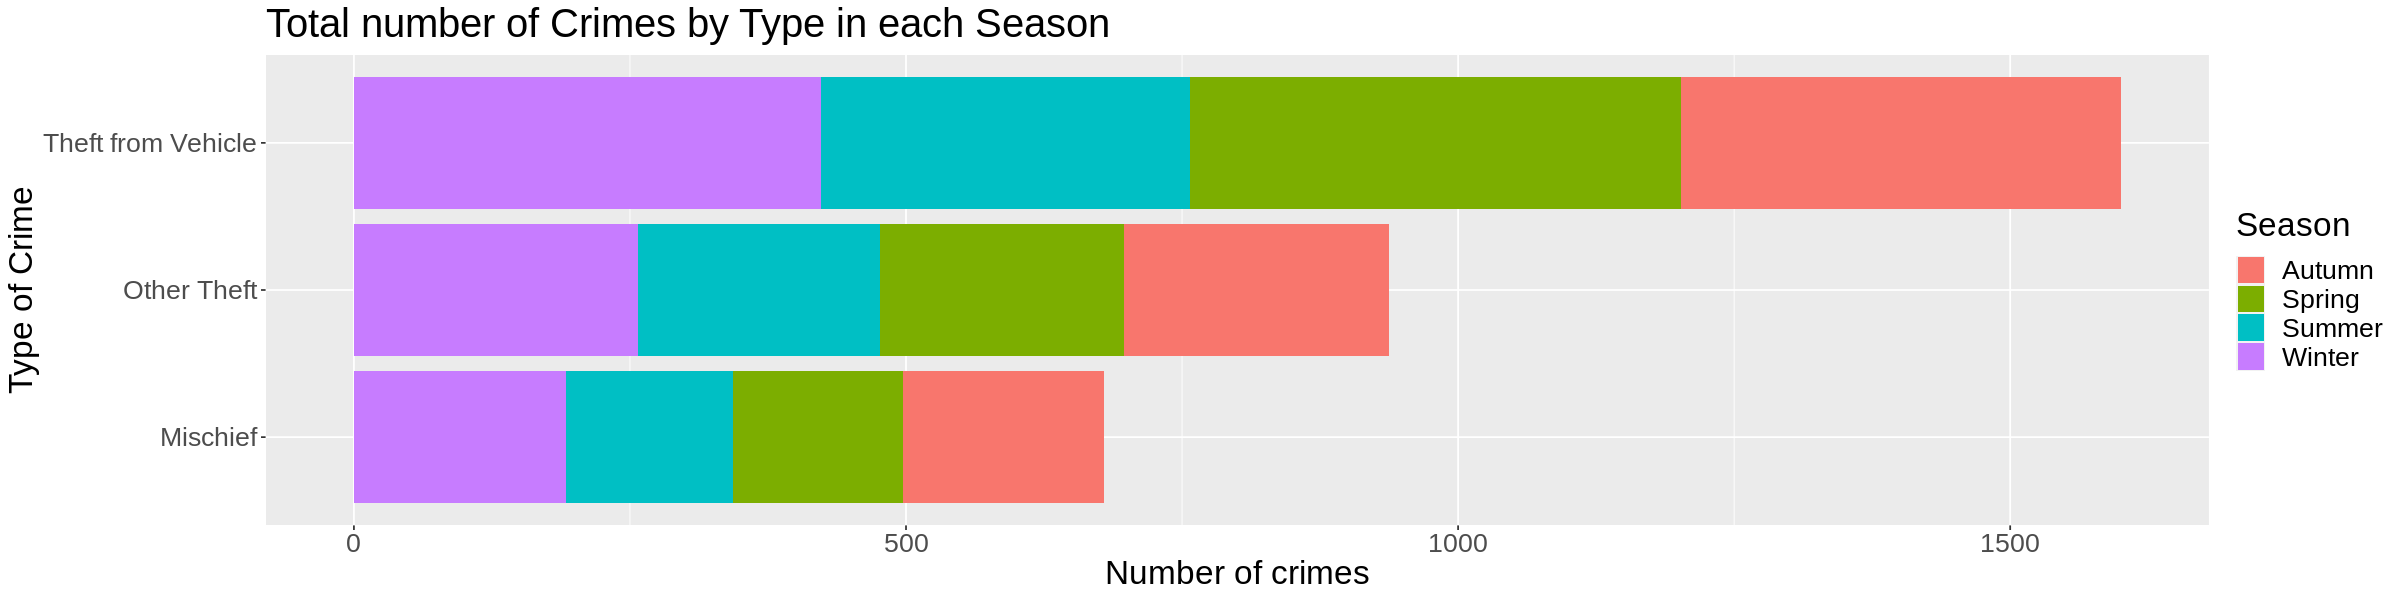

In [193]:
# Bar Plot for types of crimes in each season 
top3_types_of_crime <- c("Theft from Vehicle", "Other Theft", "Mischief")

crimes_by_type_and_season_top3 <- crimes_by_type_and_season %>%
    filter(TYPE %in% top3_types_of_crime)

 
options(repr.plot.width = 20, repr.plot.height = 5)

crimes_by_type_and_season_plot <- crimes_by_type_and_season_top3 %>%
    ggplot(aes(x = count_crimes,
               y = TYPE, 
               fill = Season)) +
    geom_bar(stat = "identity") +
    labs(x = "Number of crimes", y = "Type of Crime") +
    ggtitle("Total number of Crimes by Type in each Season") +
    theme(text = element_text(size = 20))

crimes_by_type_and_season_plot